In [373]:
import pandas as pd
from features import features
features = ['R_fighter',
 'B_fighter',
 # 'R_odds',
 # 'B_odds',
 # 'Spread',
 # 'Anomaly',
 'R_ev',
 'B_ev',
 'date',
 'location',
 'country',
 'Winner',
 'title_bout',
 'weight_class',
 'gender',
 'no_of_rounds',
 'B_current_lose_streak',
 'B_current_win_streak',
 'B_draw',
 'B_avg_SIG_STR_landed',
 'B_avg_SIG_STR_pct',
 'B_avg_SUB_ATT',
 'B_avg_TD_landed',
 'B_avg_TD_pct',
 'B_longest_win_streak',
 'B_losses',
 'B_total_rounds_fought',
 'B_total_title_bouts',
 # 'B_win_by_Decision_Majority',
 # 'B_win_by_Decision_Split',
 # 'B_win_by_Decision_Unanimous',
 # 'B_win_by_KO/TKO',
 # 'B_win_by_Submission',
 # 'B_win_by_TKO_Doctor_Stoppage',
 'B_wins',
 'B_Stance',
 'B_Height_cms',
 'B_Reach_cms',
 'B_Weight_lbs',
 'R_current_lose_streak',
 'R_current_win_streak',
 'R_draw',
 'R_avg_SIG_STR_landed',
 'R_avg_SIG_STR_pct',
 'R_avg_SUB_ATT',
 'R_avg_TD_landed',
 'R_avg_TD_pct',
 'R_longest_win_streak',
 'R_losses',
 'R_total_rounds_fought',
 'R_total_title_bouts',
 # 'R_win_by_Decision_Majority',
 # 'R_win_by_Decision_Split',
 # 'R_win_by_Decision_Unanimous',
 # 'R_win_by_KO/TKO',
 # 'R_win_by_Submission',
 # 'R_win_by_TKO_Doctor_Stoppage',
 'R_wins',
 'R_Stance',
 'R_Height_cms',
 'R_Reach_cms',
 'R_Weight_lbs',
 'R_age',
 'B_age',
 'lose_streak_dif',
 'win_streak_dif',
 'longest_win_streak_dif',
 'win_dif',
 'loss_dif',
 'total_round_dif',
 'total_title_bout_dif',
 'ko_dif',
 'sub_dif',
 'height_dif',
 'reach_dif',
 'age_dif',
 'sig_str_dif',
 'avg_sub_att_dif',
 'avg_td_dif',
 'empty_arena',
 'constant_1'
]
df = pd.read_csv("./data/UFC Data.csv")
df = df[features]

In [374]:
df.head()
# Curtis Blaydes vs Derrick Lewis	2/20/2021	

,R_fighter,B_fighter,R_ev,B_ev,date,location,country,Winner,title_bout,weight_class,...,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1
0,Curtis Blaydes,Derrick Lewis,25.000000,300.000000,2/20/2021,"Las Vegas, Nevada, USA",USA,Blue,False,Heavyweight,...,0,0,-2.54,-2.54,6,-1.00,0.0,-6.12,1,1
1,Ketlen Vieira,Yana Kunitskaya,35.971223,215.000000,2/20/2021,"Las Vegas, Nevada, USA",USA,Blue,False,Women's Bantamweight,...,0,0,-5.08,0.00,2,1.56,-0.3,-0.57,1,1
2,Charles Rosa,Darrick Minner,52.631579,150.000000,2/20/2021,"Las Vegas, Nevada, USA",USA,Blue,False,Featherweight,...,0,0,-5.08,0.00,-4,0.13,2.6,1.24,1,1
3,Aleksei Oleinik,Chris Daukaus,140.000000,56.497175,2/20/2021,"Las Vegas, Nevada, USA",USA,Blue,False,Heavyweight,...,0,0,2.54,-10.16,-12,8.31,-2.4,-2.38,1,1
4,Phil Hawes,Nassourdine Imavov,NaN,NaN,2/20/2021,"Las Vegas, Nevada, USA",USA,Red,False,Middleweight,...,0,0,7.62,-5.08,-7,0.73,1.6,-2.20,1,1


In [375]:
df.date = pd.to_datetime(df.date, format="%m/%d/%Y")

df.day = df.date.dt.day
df.month = df.date.dt.month
df.year = df.date.dt.year

df.drop('date', axis=1, inplace=True)


df.B_ev = df.B_ev * 0.01
df.R_ev = df.R_ev * 0.01
df = df.dropna(subset=['B_ev'])
df = df.dropna(subset=['R_ev'])

/var/folders/bh/54y95t956h793hywb9szy8gh0000gn/T/ipykernel_91952/3514930826.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.day = df.date.dt.day
/var/folders/bh/54y95t956h793hywb9szy8gh0000gn/T/ipykernel_91952/3514930826.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.month = df.date.dt.month
/var/folders/bh/54y95t956h793hywb9szy8gh0000gn/T/ipykernel_91952/3514930826.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.year = df.date.dt.year


In [376]:
cat = df.select_dtypes(include='object').columns

In [377]:
num = df.select_dtypes(exclude='object')

In [378]:
null_cols = num.columns[num.isnull().any()].tolist()

In [379]:
df = df.drop(null_cols, axis=1)

In [380]:
num = df.select_dtypes(exclude='object')

In [381]:
df.Winner

0       Blue
1       Blue
2       Blue
3       Blue
5       Blue
        ... 
4583    Blue
4584     Red
4585     Red
4586     Red
4587    Blue
Name: Winner, Length: 4587, dtype: object

In [382]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

ordinal_encoder = OrdinalEncoder()
df[cat] = ordinal_encoder.fit_transform(df[cat])


y = df.Winner.replace('Blue', 1).replace('Red', -1)
X = df.drop('Winner', axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.8, random_state=0)



In [383]:
df.Winner

0       0.0
1       0.0
2       0.0
3       0.0
5       0.0
       ... 
4583    0.0
4584    1.0
4585    1.0
4586    1.0
4587    0.0
Name: Winner, Length: 4587, dtype: float64

In [356]:
X_train

,R_fighter,B_fighter,R_ev,B_ev,location,country,title_bout,weight_class,gender,no_of_rounds,...,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1
3384,325.0,751.0,0.740741,1.250000,112.0,21.0,True,3.0,1.0,5,...,3,-1,2.54,-2.54,-2,-24.464286,0.053571,-3.857143,0,1
1742,1188.0,721.0,1.250000,0.689655,94.0,21.0,False,7.0,1.0,3,...,-1,0,-7.62,-12.70,3,18.631579,-0.208020,2.210526,0,1
2500,1185.0,96.0,0.190476,4.150000,122.0,2.0,False,0.0,1.0,3,...,-1,0,2.54,-2.54,-5,-48.333333,0.000000,0.500000,0,1
396,925.0,357.0,1.000000,0.833333,60.0,26.0,False,2.0,1.0,3,...,0,0,2.54,-2.54,5,-3.350000,1.200000,2.430000,1,1
626,905.0,669.0,0.952381,0.869565,140.0,3.0,False,5.0,1.0,3,...,0,-3,-2.54,-7.62,9,0.380000,-0.100000,-3.840000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,716.0,18.0,0.298507,2.750000,78.0,21.0,False,6.0,1.0,5,...,2,-4,2.54,-17.78,-5,2.818182,-0.573427,-1.734266,0,1
3265,540.0,335.0,0.357143,2.550000,1.0,22.0,False,4.0,1.0,3,...,1,0,-5.08,-2.54,-4,16.000000,1.000000,1.000000,0,1
1654,1095.0,822.0,0.500000,1.700000,43.0,3.0,False,9.0,0.0,3,...,-1,-2,5.08,5.08,10,24.750000,-0.375000,0.750000,0,1
2608,959.0,1450.0,0.689655,1.250000,49.0,23.0,False,3.0,1.0,3,...,0,0,-10.16,-7.62,-5,7.000000,-0.428571,-1.428571,0,1


In [357]:
from sklearn.metrics import mean_absolute_error, accuracy_score
import matplotlib.pyplot as plt

def score_model(X_train, X_valid, y_train, y_valid, model=DecisionTreeRegressor, flush=True, **kwargs):
    random_state = kwargs.get('random_state', 42)
    model_tree = model(random_state=random_state, **kwargs)
    
    tree_pipeline = Pipeline(steps=[
        # ('preprocesor', preprocesor),
        ('model', model_tree),
    ])
    
    tree_pipeline.fit(X_train, y_train)
    preds = tree_pipeline.predict(X_valid)
    
    mae = mean_absolute_error([round(i) for i in preds], y_valid)
    acc = accuracy_score([round(i) for i in preds], y_valid)
    if flush:
        print(f'\rMAE: {mae} | Acc Score: {acc}| {kwargs=}', end='', flush=True)
    return mae, preds


def display_plot(x_values, y_values, xlabel: str = '', ylabel: str = '', title: str = '', label: str = 'x'):

    plt.figure(figsize=(6, 3))
    plt.plot(x_values, y_values, linestyle='-', color='b', label=label)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    
    plt.show()

MAE: 0.4307901907356948 | Acc Score: 0.5692098092643052| kwargs={'max_leaf_nodes': 500}
DecisionTreeRegressor - Best MAE: 0.3588555858310627 with max_leaf_nodes=2


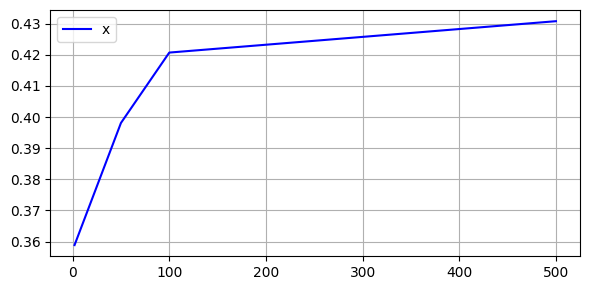

MAE: 0.3588555858310627 | Acc Score: 0.6411444141689373| kwargs={'max_leaf_nodes': 500}
RandomForestClassifier - Best MAE: 0.353133514986376 with max_leaf_nodes=50


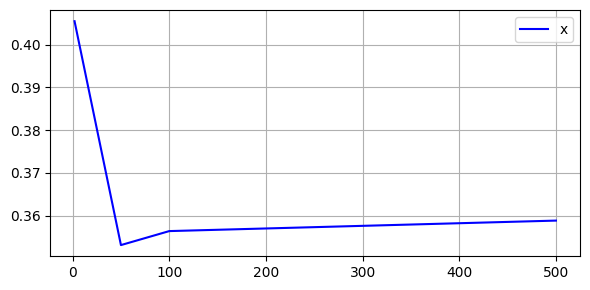

MAE: 0.3697547683923706 | Acc Score: 0.6302452316076295| kwargs={'max_leaf_nodes': 500}
RandomForestRegressor - Best MAE: 0.3583106267029973 with max_leaf_nodes=50


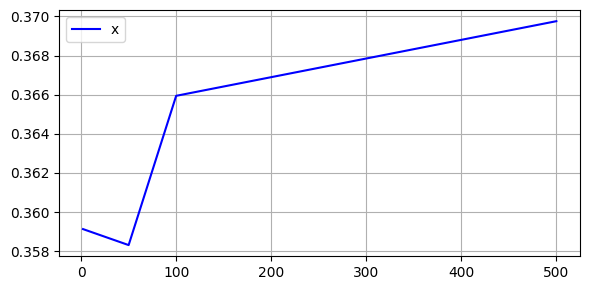

MAE: 0.3798365122615804 | Acc Score: 0.6201634877384197| kwargs={'n_estimators': 46}}
RandomForestRegressor2 - Best MAE: 0.3692098092643052 with n_estimators=31


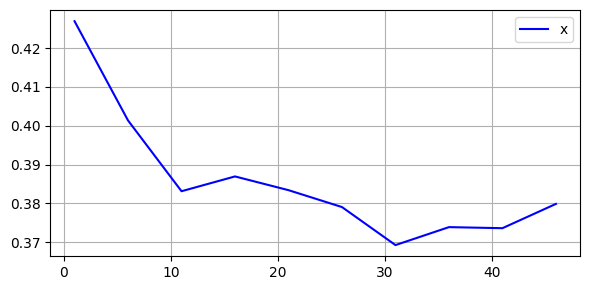

MAE: 0.385558583106267 | Acc Score: 0.614441416893733| kwargs={'n_estimators': 46}41}
XGBRegressor - Best MAE: 0.3787465940054496 with n_estimators=21


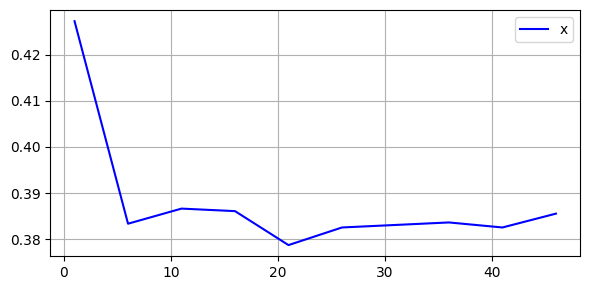

MAE: 0.3643051771117166 | Acc Score: 0.6356948228882834| kwargs={'max_leaf_nodes': 500}
GradientBoostingRegressor - Best MAE: 0.3564032697547684 with max_leaf_nodes=2


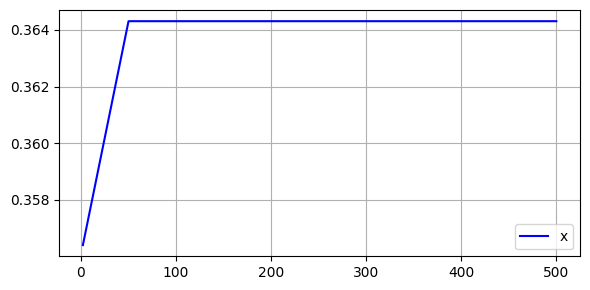

MAE: 0.3583106267029973 | Acc Score: 0.6416893732970027| kwargs={'n_estimators': 46}}
GradientBoostingRegressor2 - Best MAE: 0.353133514986376 with n_estimators=6


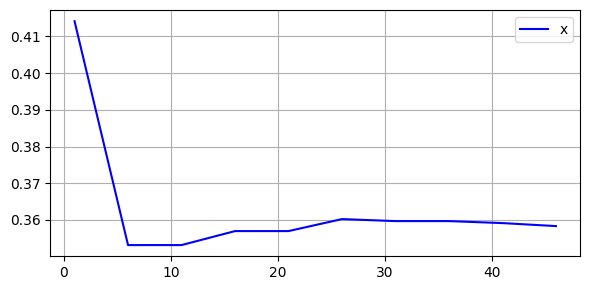

MAE: 0.3555858310626703 | Acc Score: 0.6444141689373297| kwargs={'n_estimators': 46}}
GradientBoostingClassifier - Best MAE: 0.3534059945504087 with n_estimators=6


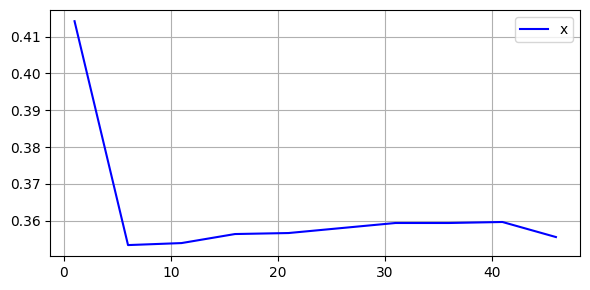

In [358]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBRegressor

leaf_nodes = [2, 50, 100, 500]
n_estimators = list(range(1, 50, 5))


# Supervised Learning - Regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Supervised Learning - Classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Neural Networks (for both classification and regression)
from sklearn.neural_network import MLPClassifier, MLPRegressor

models = {
    'DecisionTreeRegressor': {
        'model': DecisionTreeRegressor,
        'max_leaf_nodes': leaf_nodes
    },
    'RandomForestClassifier': {
        'model': RandomForestClassifier,
        'max_leaf_nodes': leaf_nodes
    },
    'RandomForestRegressor': {
        'model': RandomForestRegressor,
        'max_leaf_nodes': leaf_nodes,
    },
    'RandomForestRegressor2': {
        'model': RandomForestRegressor,
        'n_estimators': n_estimators
    },
    'XGBRegressor': {
        'model': XGBRegressor,
        'n_estimators': list(range(1, 50, 5))
    },
    'GradientBoostingRegressor': {
        'model': GradientBoostingRegressor,
        'max_leaf_nodes': leaf_nodes,
    },
    
    'GradientBoostingRegressor2': {
        'model': GradientBoostingRegressor,
        'n_estimators': n_estimators
    },
    
    'GradientBoostingClassifier': {
        'model': GradientBoostingClassifier,
        'n_estimators': n_estimators
    },
    'GradientBoostingClassifier': {
        'model': GradientBoostingClassifier,
        'n_estimators': n_estimators
    },
}

results = {}

for key, item in models.items():
    keys = list(item.keys())
    model = item['model']
    
    maes = []
    for i in item[keys[1]]:
        mae, _ = score_model(
            X_train, X_valid, y_train, y_valid, 
            model, **{keys[1]:i}
        )
        maes.append(mae)
        
    best_mae =  min(maes)
    mae_index = item[keys[1]][maes.index(best_mae)]
    results[key] = f'{key} - Best MAE: {best_mae} with {keys[1]}={mae_index}'
    
    print(f'\n{results[key]}')
    display_plot(item[keys[1]], maes)



In [359]:
import json

print(json.dumps(results, indent=4))

{
    "DecisionTreeRegressor": "DecisionTreeRegressor - Best MAE: 0.3588555858310627 with max_leaf_nodes=2",
    "RandomForestClassifier": "RandomForestClassifier - Best MAE: 0.353133514986376 with max_leaf_nodes=50",
    "RandomForestRegressor": "RandomForestRegressor - Best MAE: 0.3583106267029973 with max_leaf_nodes=50",
    "RandomForestRegressor2": "RandomForestRegressor2 - Best MAE: 0.3692098092643052 with n_estimators=31",
    "XGBRegressor": "XGBRegressor - Best MAE: 0.3787465940054496 with n_estimators=21",
    "GradientBoostingRegressor": "GradientBoostingRegressor - Best MAE: 0.3564032697547684 with max_leaf_nodes=2",
    "GradientBoostingRegressor2": "GradientBoostingRegressor2 - Best MAE: 0.353133514986376 with n_estimators=6",
    "GradientBoostingClassifier": "GradientBoostingClassifier - Best MAE: 0.3534059945504087 with n_estimators=6"
}


In [360]:
len(pred)

3671

In [394]:
model = GradientBoostingClassifier(random_state=0, n_estimators=6)
import numpy as np

model.fit(X_train, y_train)
pred = model.predict(X_valid)

res_df = pd.DataFrame(
    {
        'pred': pred, 
        'actual': y_valid, 
        'B': X_valid.B_ev, 
        'R': X_valid.R_ev
    }
)

res_df['rb'] =  np.where(res_df.actual == 1, res_df['R'] * 100, -100)
res_df['bb'] =  np.where(res_df.actual == 0, res_df['B'] * 100, -100)


print('1: ', (res_df.pred == 1).sum())
print('0: ', (res_df.pred == 0).sum())


print(res_df.head(20))

print('Only R', res_df['rb'].sum())
print('Only B', res_df['bb'].sum())
print('Total', res_df['bb'].sum() + res_df['rb'].sum())


res_df.to_csv('res.csv')

1:  2551
0:  1119
      pred  actual         B         R          rb          bb
2467   0.0     1.0  0.303030  2.700000  270.000000 -100.000000
4561   0.0     1.0  0.434783  1.900000  190.000000 -100.000000
221    1.0     1.0  2.750000  0.277778   27.777778 -100.000000
940    0.0     0.0  0.645161  1.350000 -100.000000   64.516129
2506   1.0     0.0  1.600000  0.588235 -100.000000  160.000000
3722   1.0     1.0  1.900000  0.476190   47.619048 -100.000000
2700   1.0     1.0  1.500000  0.588235   58.823529 -100.000000
1650   1.0     0.0  0.526316  1.650000 -100.000000   52.631579
3787   0.0     1.0  0.333333  2.500000  250.000000 -100.000000
2018   0.0     1.0  0.384615  2.200000  220.000000 -100.000000
1827   0.0     0.0  0.540541  1.600000 -100.000000   54.054054
1557   1.0     0.0  1.200000  0.769231 -100.000000  120.000000
1481   1.0     1.0  2.450000  0.344828   34.482759 -100.000000
1582   1.0     0.0  1.500000  0.588235 -100.000000  150.000000
1128   1.0     1.0  4.650000  0.15873

In [365]:
res_df

,pred,actual,B,R
2467,0.0,1.0,0.303030,2.700000
4561,0.0,1.0,0.434783,1.900000
221,1.0,1.0,2.750000,0.277778
940,0.0,0.0,0.645161,1.350000
2506,1.0,0.0,1.600000,0.588235
...,...,...,...,...
3190,0.0,0.0,0.392157,2.350000
1861,0.0,0.0,0.588235,1.500000
3828,1.0,0.0,2.550000,0.357143
3325,1.0,1.0,1.450000,0.645161


In [370]:
y

0       0.0
1       0.0
2       0.0
3       0.0
5       0.0
       ... 
4583    0.0
4584    1.0
4585    1.0
4586    1.0
4587    0.0
Name: Winner, Length: 4587, dtype: float64